In [1]:
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

%matplotlib inline

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_dir = '../../data/tiny-imagenet'

In [3]:
def parse(example_proto):
  features = tf.parse_single_example(
        example_proto,
        features={
            'image': tf.FixedLenFeature([], tf.string),
            'label': tf.FixedLenFeature([], tf.int64),
        })
  image = tf.decode_raw(features['image'], tf.uint8)
  image = tf.reshape(image, [64, 64, 3])
  label = features['label']
  return image, label

In [4]:
def input_fn(data_dir, data_file):
  dataset = tf.data.TFRecordDataset(os.path.join(data_dir, data_file)).repeat(1)
  dataset = dataset.map(parse)
  dataset = dataset.batch(16)
  iterator = dataset.make_one_shot_iterator()
  image, label = iterator.get_next()
  return image, label


In [5]:
with open(os.path.join(data_dir, 'labels.txt')) as f:
    label_to_class = {int(line.split()[1]): line.split()[0] for line in f}
with open(os.path.join(data_dir, 'tiny-imagenet-200/words.txt')) as f:
    class_to_desc = {line.split()[0]: line.split()[1] for line in f}
    

In [6]:
image, label = input_fn(data_dir, 'training_1.tfrecords')
with tf.Session() as sess:
    images, labels = sess.run([image, label])          

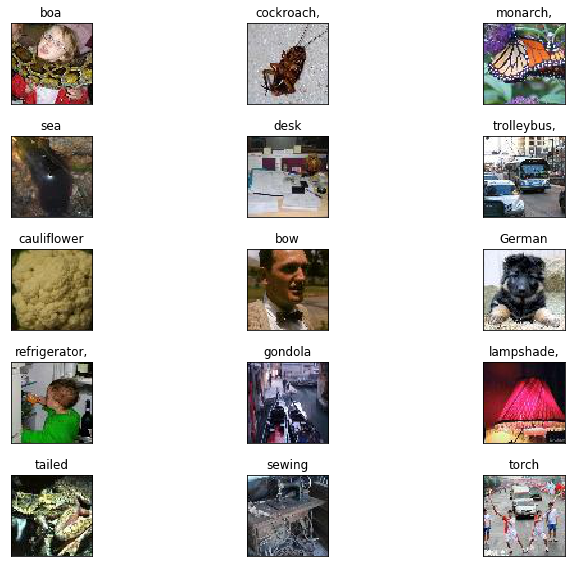

In [7]:
figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image, label in zip(axis.flat[0:], images, labels):
    ax.set_title(class_to_desc[label_to_class[label]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)


In [8]:
image, label = input_fn(data_dir, 'validation.tfrecords')
with tf.Session() as sess:
    images, labels = sess.run([image, label])           


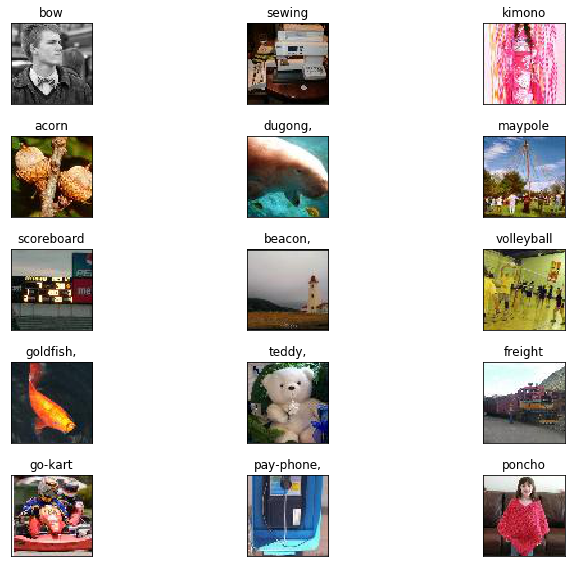

In [9]:
figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image, label in zip(axis.flat[0:], images, labels):
    ax.set_title(class_to_desc[label_to_class[label]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)
